In [57]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.optimizers import Adamax

In [58]:
max_features = 10000
maxlen = 500
batch_size = 64


(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

RNN

In [59]:
model_RNN = Sequential()
model_RNN.add(Embedding(max_features, 32))
model_RNN.add(SimpleRNN(units=32))
model_RNN.add(Dense(units=1, activation='sigmoid'))


model_RNN.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model_RNN.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [60]:
history_RNN = model_RNN.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 16s 73ms/step - loss: 0.6444 - accuracy: 0.6265 - val_loss: 0.5698 - val_accuracy: 0.7140
Epoch 2/10
200/200 [==============================] - 14s 71ms/step - loss: 0.5349 - accuracy: 0.7509 - val_loss: 0.5270 - val_accuracy: 0.7552
Epoch 3/10
200/200 [==============================] - 14s 72ms/step - loss: 0.4699 - accuracy: 0.7984 - val_loss: 0.4643 - val_accuracy: 0.7972
Epoch 4/10
200/200 [==============================] - 14s 72ms/step - loss: 0.4265 - accuracy: 0.8181 - val_loss: 0.4532 - val_accuracy: 0.7928
Epoch 5/10
200/200 [==============================] - 15s 74ms/step - loss: 0.3983 - accuracy: 0.8366 - val_loss: 0.4257 - val_accuracy: 0.8156
Epoch 6/10
200/200 [==============================] - 15s 73ms/step - loss: 0.3701 - accuracy: 0.8517 - val_loss: 0.4131 - val_accuracy: 0.8206
Epoch 7/10
200/200 [==============================] - 15s 73ms/step - loss: 0.3554 - accuracy: 0.8564 - val_loss: 0.4013 - val_accuracy:

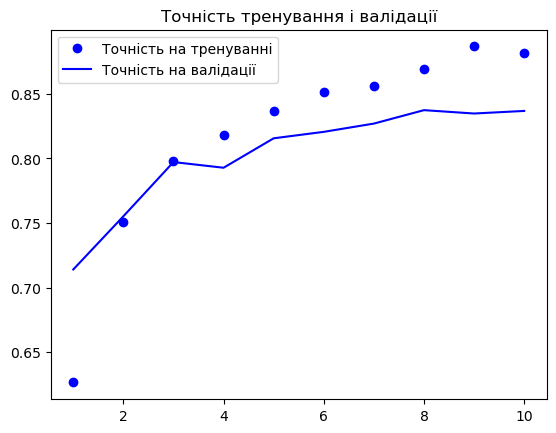

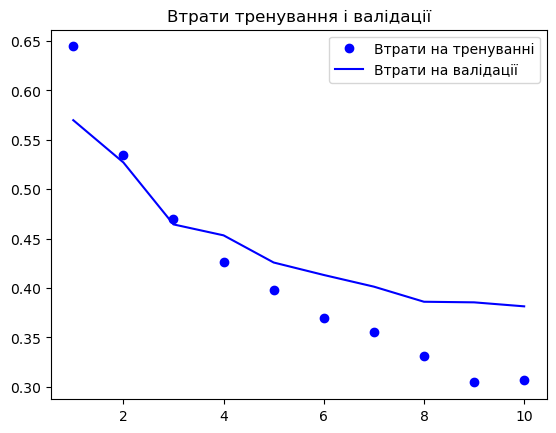

In [61]:
acc = history_RNN.history['accuracy']
val_acc = history_RNN.history['val_accuracy']
loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [62]:
_, accuracy_RNN = model_RNN.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_RNN)

782/782 [==============================] - 14s 18ms/step - loss: 0.3813 - accuracy: 0.8411
Test accuracy: 0.8411200046539307


LSTM

In [63]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 32))
model_LSTM.add(LSTM(units=32))
model_LSTM.add(Dense(units=1, activation='sigmoid'))

model_LSTM.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [64]:
history_LSTM = model_LSTM.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 44s 208ms/step - loss: 0.6871 - accuracy: 0.5891 - val_loss: 0.6497 - val_accuracy: 0.6402
Epoch 2/10
200/200 [==============================] - 41s 203ms/step - loss: 0.5614 - accuracy: 0.7540 - val_loss: 0.5003 - val_accuracy: 0.8026
Epoch 3/10
200/200 [==============================] - 42s 211ms/step - loss: 0.4535 - accuracy: 0.8176 - val_loss: 0.4243 - val_accuracy: 0.8394
Epoch 4/10
200/200 [==============================] - 41s 207ms/step - loss: 0.3754 - accuracy: 0.8520 - val_loss: 0.3668 - val_accuracy: 0.8534
Epoch 5/10
200/200 [==============================] - 41s 206ms/step - loss: 0.3290 - accuracy: 0.8724 - val_loss: 0.3362 - val_accuracy: 0.8666
Epoch 6/10
200/200 [==============================] - 41s 207ms/step - loss: 0.2953 - accuracy: 0.8858 - val_loss: 0.3156 - val_accuracy: 0.8740
Epoch 7/10
200/200 [==============================] - 42s 208ms/step - loss: 0.2750 - accuracy: 0.8947 - val_loss: 0.3098 - val_ac

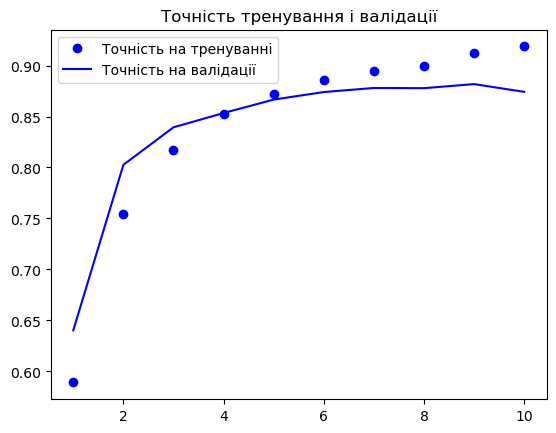

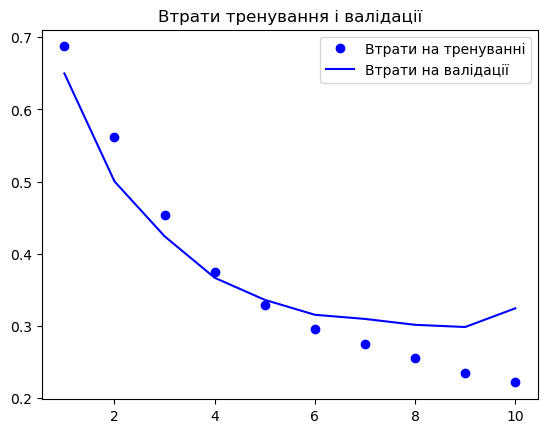

In [65]:
acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [66]:
_, accuracy_LSTM = model_LSTM.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_LSTM)

782/782 [==============================] - 27s 34ms/step - loss: 0.3315 - accuracy: 0.8651
Test accuracy: 0.865119993686676


Bidirectional RNN

In [67]:
model_BRNN = Sequential()
model_BRNN.add(Embedding(max_features, 32))
model_BRNN.add(Bidirectional(SimpleRNN(units=32)))
model_BRNN.add(Dense(units=1, activation='sigmoid'))

model_BRNN.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model_BRNN.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               4160      
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 324,225
Trainable params: 324,225
Non-trainable params: 0
_________________________________________________________________


In [68]:
history_BRNN = model_BRNN.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 30s 143ms/step - loss: 0.6861 - accuracy: 0.5459 - val_loss: 0.6538 - val_accuracy: 0.6534
Epoch 2/10
200/200 [==============================] - 28s 140ms/step - loss: 0.6291 - accuracy: 0.6760 - val_loss: 0.6004 - val_accuracy: 0.7138
Epoch 3/10
200/200 [==============================] - 28s 140ms/step - loss: 0.5583 - accuracy: 0.7420 - val_loss: 0.5944 - val_accuracy: 0.6932
Epoch 4/10
200/200 [==============================] - 28s 140ms/step - loss: 0.5187 - accuracy: 0.7620 - val_loss: 0.5017 - val_accuracy: 0.7792
Epoch 5/10
200/200 [==============================] - 28s 141ms/step - loss: 0.4652 - accuracy: 0.8017 - val_loss: 0.4788 - val_accuracy: 0.7830
Epoch 6/10
200/200 [==============================] - 28s 140ms/step - loss: 0.4507 - accuracy: 0.8044 - val_loss: 0.4500 - val_accuracy: 0.8024
Epoch 7/10
200/200 [==============================] - 28s 140ms/step - loss: 0.4030 - accuracy: 0.8322 - val_loss: 0.4628 - val_ac

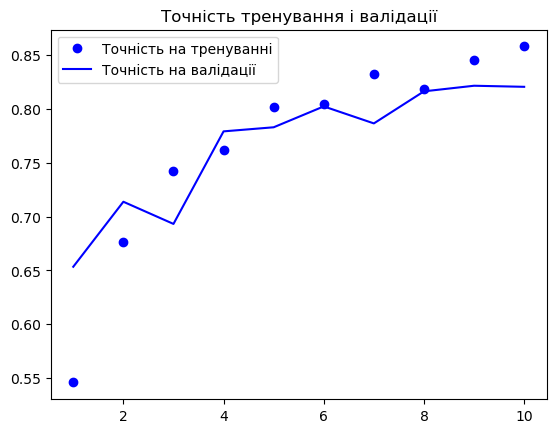

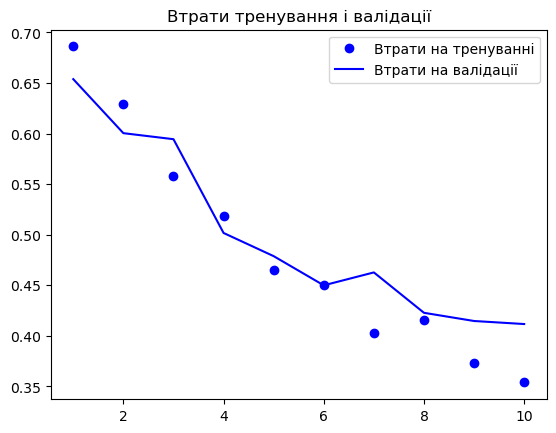

In [69]:
acc = history_BRNN.history['accuracy']
val_acc = history_BRNN.history['val_accuracy']
loss = history_BRNN.history['loss']
val_loss = history_BRNN.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [70]:
_, accuracy_BRNN = model_BRNN.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_BRNN)

782/782 [==============================] - 26s 33ms/step - loss: 0.4088 - accuracy: 0.8214
Test accuracy: 0.8213599920272827


Bidirectional LSTM

In [71]:
model_BLSTM = Sequential()
model_BLSTM.add(Embedding(max_features, 32))
model_BLSTM.add(Bidirectional(LSTM(units=32)))
model_BLSTM.add(Dense(units=1, activation='sigmoid'))

model_BLSTM.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model_BLSTM.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [72]:
history_BLSTM = model_RNN.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2797 - accuracy: 0.8974 - val_loss: 0.3725 - val_accuracy: 0.8416
Epoch 2/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2717 - accuracy: 0.8979 - val_loss: 0.3628 - val_accuracy: 0.8472
Epoch 3/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2567 - accuracy: 0.9046 - val_loss: 0.3500 - val_accuracy: 0.8536
Epoch 4/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2433 - accuracy: 0.9123 - val_loss: 0.3451 - val_accuracy: 0.8548
Epoch 5/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2405 - accuracy: 0.9107 - val_loss: 0.3508 - val_accuracy: 0.8526
Epoch 6/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2287 - accuracy: 0.9190 - val_loss: 0.3551 - val_accuracy: 0.8580
Epoch 7/10
200/200 [==============================] - 15s 74ms/step - loss: 0.2179 - accuracy: 0.9217 - val_loss: 0.3444 - val_accuracy:

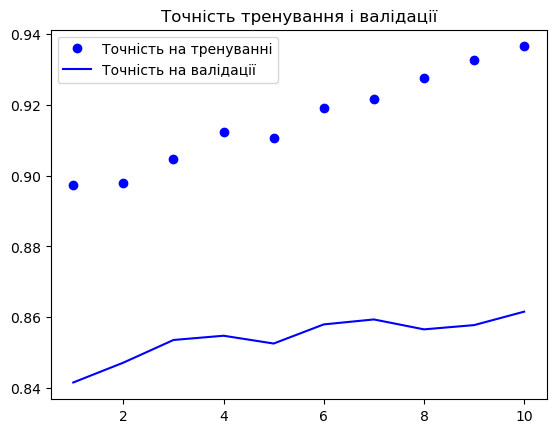

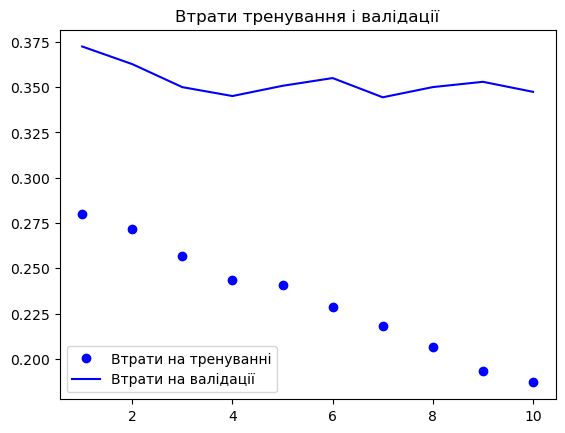

In [73]:
acc = history_BLSTM.history['accuracy']
val_acc = history_BLSTM.history['val_accuracy']
loss = history_BLSTM.history['loss']
val_loss = history_BLSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [74]:
_, accuracy_BLSTM = model_BLSTM.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_BLSTM)

782/782 [==============================] - 45s 55ms/step - loss: 0.6933 - accuracy: 0.4964
Test accuracy: 0.49636000394821167


RNN with deep layers

In [75]:
model_RNNDL = Sequential()
model_RNNDL.add(Embedding(max_features, 32))
model_RNNDL.add(SimpleRNN(units=32, return_sequences=True))
model_RNNDL.add(SimpleRNN(units=32))
model_RNNDL.add(Dense(units=1, activation='sigmoid'))

model_RNNDL.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_RNNDL.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


In [76]:
history_RNNDL = model_RNNDL.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 32s 151ms/step - loss: 0.6012 - accuracy: 0.6495 - val_loss: 0.4184 - val_accuracy: 0.8210
Epoch 2/10
200/200 [==============================] - 29s 146ms/step - loss: 0.3851 - accuracy: 0.8382 - val_loss: 0.3566 - val_accuracy: 0.8540
Epoch 3/10
200/200 [==============================] - 29s 146ms/step - loss: 0.3282 - accuracy: 0.8666 - val_loss: 0.3452 - val_accuracy: 0.8588
Epoch 4/10
200/200 [==============================] - 29s 146ms/step - loss: 0.2497 - accuracy: 0.9010 - val_loss: 0.3686 - val_accuracy: 0.8642
Epoch 5/10
200/200 [==============================] - 29s 145ms/step - loss: 0.2175 - accuracy: 0.9155 - val_loss: 0.4600 - val_accuracy: 0.7942
Epoch 6/10
200/200 [==============================] - 29s 145ms/step - loss: 0.1804 - accuracy: 0.9327 - val_loss: 0.4003 - val_accuracy: 0.8572
Epoch 7/10
200/200 [==============================] - 29s 145ms/step - loss: 0.1171 - accuracy: 0.9588 - val_loss: 0.4936 - val_ac

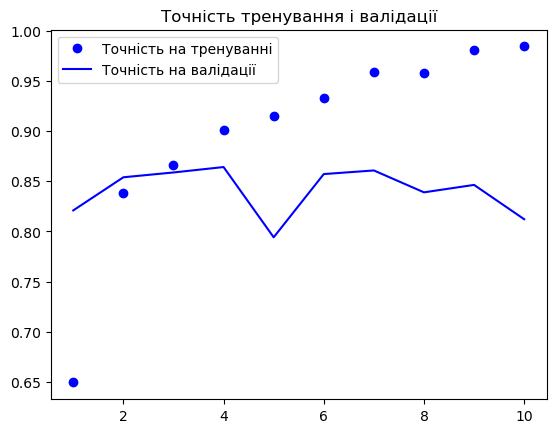

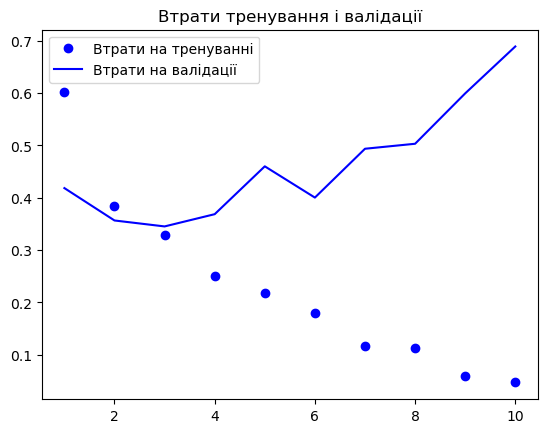

In [77]:
acc = history_RNNDL.history['accuracy']
val_acc = history_RNNDL.history['val_accuracy']
loss = history_RNNDL.history['loss']
val_loss = history_RNNDL.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [78]:
_, accuracy_RNNDL = model_RNNDL.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_RNNDL)

782/782 [==============================] - 27s 35ms/step - loss: 0.7393 - accuracy: 0.8030
Test accuracy: 0.8029599785804749


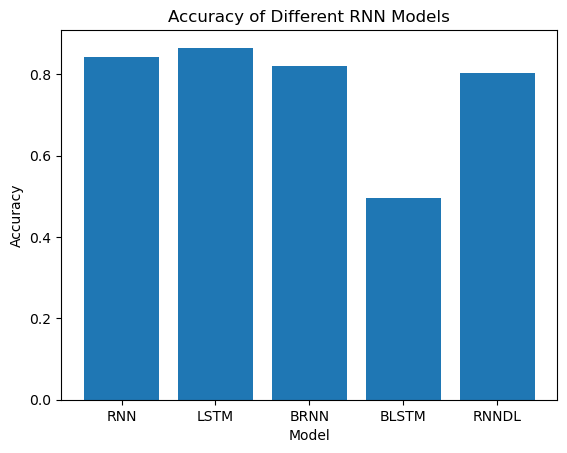

In [79]:
models = ['RNN', 'LSTM', 'BRNN', 'BLSTM', 'RNNDL']
accuracies = [accuracy_RNN, accuracy_LSTM, accuracy_BRNN, accuracy_BLSTM, accuracy_RNNDL]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different RNN Models')
plt.show()